Import car file

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/auto.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Print column types

In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Drop unwanted columns

In [4]:
df.drop('Engine Fuel Type', axis=1, inplace=True)
df.drop('Market Category', axis=1, inplace=True)
df.drop('Vehicle Style', axis=1, inplace=True)
df.drop('Popularity', axis=1, inplace=True)
df.drop('Number of Doors', axis=1, inplace=True)
df.drop('Vehicle Size', axis=1, inplace=True)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


Renamed columns

In [5]:
df = df.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode', 'highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price'})
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


Remove duplicates

In [6]:
duplicate_rows_df = df[df.duplicated()]
print('Amount of duplicate rows (duplicate rows, columns): ', duplicate_rows_df.shape)
df = df.drop_duplicates()

Amount of duplicate rows (duplicate rows, columns):  (989, 10)


Drop columns with missing values

In [7]:
print(df.isnull().sum())
df = df.dropna()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


Visualize outliers

<Axes: xlabel='Price'>

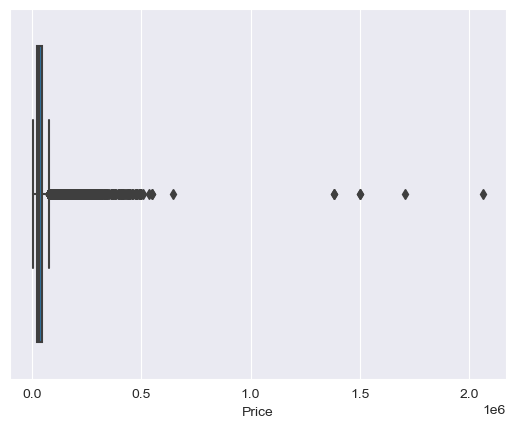

In [8]:
sns.boxplot(x=df['Price'])

Remove outliers (but only in numeric columns, otherwise we get an error)

In [15]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numeric_cols].quantile(q=0.25)
Q3 = df[numeric_cols].quantile(q=0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

          Make       Model  Year     HP  Cylinders Transmission  \
0          BMW  1 Series M  2011  335.0        6.0       MANUAL   
1          BMW    1 Series  2011  300.0        6.0       MANUAL   
2          BMW    1 Series  2011  300.0        6.0       MANUAL   
3          BMW    1 Series  2011  230.0        6.0       MANUAL   
4          BMW    1 Series  2011  230.0        6.0       MANUAL   
...        ...         ...   ...    ...        ...          ...   
11909    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11910    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11911    Acura         ZDX  2012  300.0        6.0    AUTOMATIC   
11912    Acura         ZDX  2013  300.0        6.0    AUTOMATIC   
11913  Lincoln      Zephyr  2006  221.0        6.0    AUTOMATIC   

              Drive Mode  MPG-H  MPG-C  Price  
0       rear wheel drive     26     19  46135  
1       rear wheel drive     28     19  40650  
2       rear wheel drive     28     20  36350  
3  

Visualize the brand with the most cars

Text(0.5, 0, 'Brand')

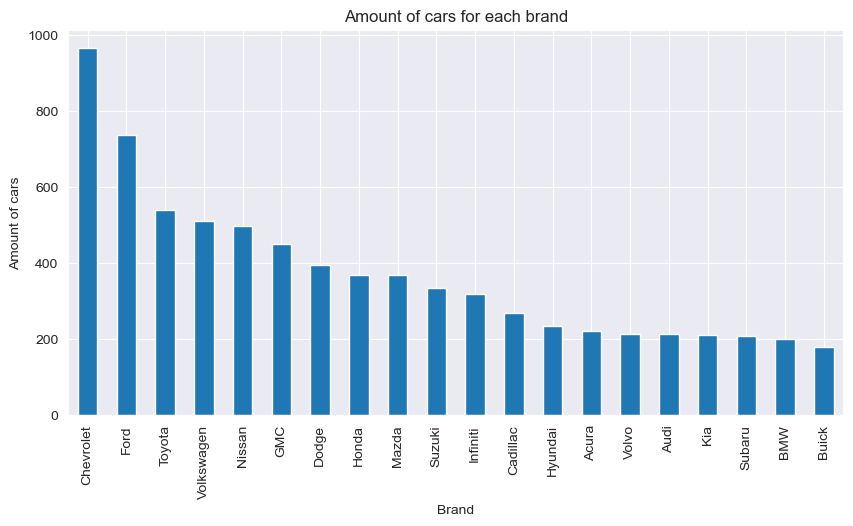

In [16]:
df.Make.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title('Amount of cars for each brand')
plt.ylabel('Amount of cars')
plt.xlabel('Brand')

Create a heat map to visualize the variable dependencies (again, only for numeric columns!)

<Axes: >

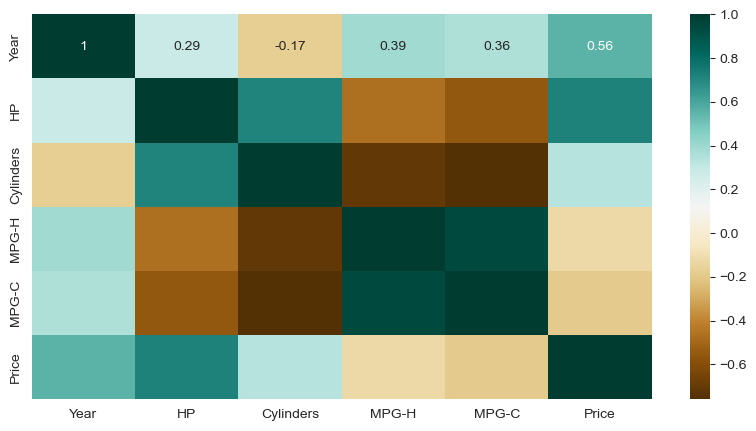

In [18]:
plt.figure(figsize=(10,5))
corr=df.corr(numeric_only=True)
sns.heatmap(corr, cmap='BrBG', annot=True)

Create a scatter plot to show that the price raises for cars with higher HP (horse power)

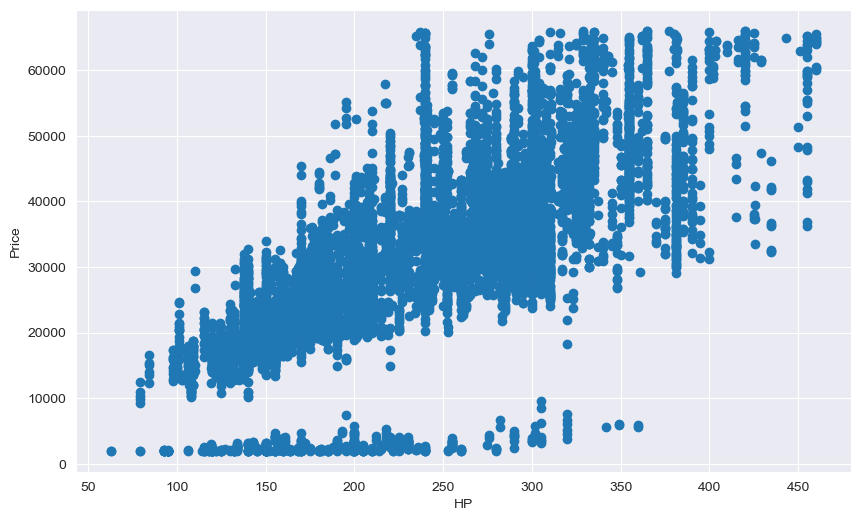

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()